In [1]:
from sklearn.decomposition import PCA
from collections import defaultdict
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
### In order to compare the allele frequencies of the Cretan population with the DKMS minorities we must
### group the alleles with g resolution as the DKMS did. We will estimate first the haplotype frequencies 
### with the Hapl-o-Mat software, because it can perform the g grouping and then, from the haplotype
### frequencies we will calculate the grouped allele frequencies and compare them with the DKMS minorities'.
### Arlequin cannot perform the grouping, so that is why it is not a suitable program for this task, although
### it does not drop the genotypes with at least one missing value. If we do not drop these lines, the 
### estimated allele frequency would be closer to the real frequency of the sample.

### After we run the Hapl-o-Mat with the g grouping without missing data we calculate the allele frequencies

def af_estimation_from_HaploMat_g_group(hfs_dat, hla_gene, num_of_people, alleles=None, counts=None):
    
    '''
    !!!README!!!
    
    This function calculates the allele frequency of the HLA genes A, B, C, DRB1, DQB1 and DPB1 
    if the haplotypes have them. 
    
    Hapl-o-Mat orders the genes in the haplotypes alphabetically.
    
    The haplotypes with 4 genes should have the HLA genes below in this order only:
    A~B~C~DRB1
    
    The haplotypes with 5 genes should have the HLA genes below in this order only:
    A~B~C~DQB1~DRB1
    
    The haplotypes with 6 genes should have the HLA genes below in this order only:
    A~B~C~DPB1~DQB1~DRB1
    
    Other combinations of the HLA genes can not be used as input.    
    
    This function returns the estimated allele frequencies/counts and alleles of the sample from Hapl-o-Mat.
    '''
    
    if hla_gene not in ('A', 'B', 'C', 'DRB1', 'DQB1', 'DPB1'):
        raise Exception("The hla_gene can only be 'A', 'B', 'C', 'DRB1', 'DQB1' or 'DPB1'")
        
    if counts and alleles:
        raise Exception('Only 1 output can come from this function.')
    
    with open(hfs_dat, 'r') as f:
        f = f.readlines()
        
    f = [x.strip('\n').split('\t') for x in f]
    allele_freq = [(x[0].split('~'), float(x[1].replace(',','.'))) for x in f]
    allele_freq = [([y.strip('g') for y in x[0]],x[1]) for x in allele_freq]
    
    '''
    allele_freq = (['A*02:01', 'B*18:01', 'C*07:01', 'DQB1*03:01', 'DRB1*11:04'], 0.02880986622617),
    '''
    
    if hla_gene == 'A':
        n = 0        
    elif hla_gene == 'B':
        n = 1        
    elif hla_gene == 'C':
        n = 2        
    
    elif hla_gene == 'DRB1': # Hapl-o-Mat orders the genes in the haplotypes alphabetically.
        if len(allele_freq[0][0]) == 3:     
            n = 2
        elif len(allele_freq[0][0]) == 4:     
            n = 3
        elif len(allele_freq[0][0]) == 5:     
            n = 4    
        elif len(allele_freq[0][0]) == 6:
            n = 5
        else:
            raise Exception('The haplotypes should have 4, 5 or 6 genes in a specific order. Read the documentation.')
    
    elif hla_gene == 'DQB1':
        if len(allele_freq[0][0]) == 4:     
            raise Exception('DQB1 should not be in a haplotype with only 4 genes. Read the documentation.')
        elif len(allele_freq[0][0]) == 5:     
            n = 3    
        elif len(allele_freq[0][0]) == 6:
            n = 4
        else:
            raise Exception('The haplotypes should have 4, 5 or 6 genes in a specific order. Read the documentation.')                 
    
    elif hla_gene == 'DPB1':
        if len(allele_freq[0][0]) == 4:     
            raise Exception('DPB1 should not be in a haplotype with only 4 genes. Read the documentation.')
        elif len(allele_freq[0][0]) == 5:     
            raise Exception('DPB1 should not be in a haplotype with only 5 genes. Read the documentation.')    
        elif len(allele_freq[0][0]) == 6:
            n = 3
        else:
            raise Exception('The haplotypes should have 4, 5 or 6 genes in a specific order. Read the documentation.')
            
    HLA_gene = {el:0 for el in [x[0][n] for x in allele_freq]}
    
    for x in allele_freq:
        HLA_gene[x[0][n]] += x[1]
    
    HLA_gene = {k:v for k, v in sorted(HLA_gene.items(), key=lambda item: item[1], reverse=True)}
    
    if alleles:
        return list(HLA_gene.keys())
    
    elif counts:        
        return {k:round(v*num_of_people) for k,v in HLA_gene.items()} 
        # No need to multiply by 2, because of the 2 genotypes on MAC input
    
    else:
        return HLA_gene
    '''
    HLA_gene = {el:{'N':0, 'AF':0} for el in [x[0][n] for x in allele_freq]}
    for x in allele_freq:
        HLA_gene[x[0][n]]['AF'] += x[1]
    for k,v in HLA_gene.items():
        #print(v)
        HLA_gene[k]['N'] = round(v['AF']*2*num_of_people) 
    #HLA_gene = {k:v for k, v in sorted(HLA_gene.items(), key=lambda item: item[1], reverse=True)}
    
    
    if alleles:
        return list(HLA_gene.keys())
    
    elif counts:        
        return {k:round(v*num_of_people) for k,v in HLA_gene.items()} 
        # No need to multiply by 2, because of the 2 genotypes on MAC input
    
    else:
        return HLA_gene
    '''

In [ ]:
#############################
##     Countries 5loci     ##
#############################

#Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_2fields_69130_5loci.dat'
#Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_CBUs_2fields_70222_5loci.dat'
#Greece_CBUs = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_CBUs_2fields_70222_5loci.dat'
#Greece_BMDs = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_CBUs_2fields_1092_5loci.dat'
#crete = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_CreteAdults_1582_5loci.dat'

dhtob = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Banks/RunX_htf_DHTOB_428_5loci.dat'
ibea = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Banks/RunX_htf_BRFAA_564_5loci.dat'
crete = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_CreteAdults_1582_5loci.dat'
Cyprus = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Cyprus/RunX_htf_cyprus_donors_2fields_73004_5loci.dat'
Austria = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Austria_10000_5loci.dat'
Bosnia = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Bosnia_10000_5loci.dat'
Croatia = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Croatia_10000_5loci.dat'
Dutch = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Dutch_10000_5loci.dat'
France = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_France_10000_5loci.dat'
Greece_DKMS = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Greece_10000_5loci.dat'
Italy = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Italy_10000_5loci.dat'
Portugal = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Portugal_10000_5loci.dat'
Romania = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Romania_10000_5loci.dat'
Spain = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Spain_10000_5loci.dat'
Turkey = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Turkey_10000_5loci.dat'

countries = [dhtob, ibea, crete, Cyprus, Austria, Bosnia, Croatia, Dutch, France, Greece_DKMS, Italy, Portugal, Romania, Spain, Turkey]
countries_names = ['PCBBC', 'BRFAA', 'Crete', 'Cyprus', 'Austria', 'Bosnia', 'Croatia', 'Dutch', 'France', 'Greece_DKMS',
                   'Italy', 'Portugal', 'Romania', 'Spain', 'Turkey']



test_all = defaultdict(lambda:defaultdict())
pca_input = defaultdict()

for country, name in zip(countries, countries_names):
    for loci in ['A', 'B', 'C', 'DRB1', 'DQB1']:
        test_all[name][loci] = af_estimation_from_HaploMat_g_group(country, loci, int(country.split('_')[-2]))

        #test_all += {**test}

   
    pca_input[name] = {**test_all[name]['A'], **test_all[name]['B'], **test_all[name]['C'],
                          **test_all[name]['DRB1'], **test_all[name]['DQB1']}
    pca_input[name] = {k:v for k,v in pca_input[name].items() if v > round(1/(2*int(country.split('_')[-2])), 6)}
    
pca_input


In [ ]:
#############################
##     Countries 3loci     ##
#############################

#Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_2fields_75599_3loci.dat'
#Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_CBUs_2fields_78611_3loci.dat'
#Greece_CBUs = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_CBUs_2fields_3012_3loci.dat'
#Greece_BMDs = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_2fields_75599_3loci.dat'
#crete = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_CreteAdults_1582_3loci.dat'

dhtob = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Banks/RunX_htf_DHTOB_428_3loci.dat'
ibea = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Banks/RunX_htf_BRFAA_592_3loci.dat'
PAP = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Banks/RunX_htf_PAP_1992_3loci.dat'
crete = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_CreteAdults_1582_3loci.dat'


Cyprus = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Cyprus/RunX_htf_cyprus_donors_2fields_96155_3loci.dat'
Austria = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Austria_10000_3loci.dat'
Bosnia = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Bosnia_10000_3loci.dat'
Croatia = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Croatia_10000_3loci.dat'
Dutch = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Dutch_10000_3loci.dat'
France = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_France_10000_3loci.dat'
Greece_DKMS = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Greece_10000_3loci.dat'
Italy = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Italy_10000_3loci.dat'
Portugal = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Portugal_10000_3loci.dat'
Romania = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Romania_10000_3loci.dat'
Spain = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Spain_10000_3loci.dat'
Turkey = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Turkey_10000_3loci.dat'

countries = [dhtob, ibea, PAP, crete, Cyprus, Austria, Bosnia, Croatia, Dutch, France, Greece_DKMS, Italy, Portugal, Romania, Spain, Turkey]
countries_names = ['PCBBC', 'BRFAA', 'Papanikolaou', 'Crete', 'Cyprus', 'Austria', 'Bosnia', 'Croatia', 'Dutch', 'France', 'Greece_DKMS',
                   'Italy', 'Portugal', 'Romania', 'Spain', 'Turkey']



test_all = defaultdict(lambda:defaultdict())
pca_input = defaultdict()

for country, name in zip(countries, countries_names):
    for loci in ['A', 'B', 'DRB1']:
        test_all[name][loci] = af_estimation_from_HaploMat_g_group(country, loci, int(country.split('_')[-2]))

        #test_all += {**test}

   
    pca_input[name] = {**test_all[name]['A'], **test_all[name]['B'],
                          **test_all[name]['DRB1'],}
    pca_input[name] = {k:v for k,v in pca_input[name].items() if v > round(1/(2*int(country.split('_')[-2])), 6)}
    
pca_input


In [ ]:
########################
##      Groups        ##
########################

Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Greece/RunX_htf_Greek_BMDs_2fields_69130_5loci.dat'
#Greece = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/DKMS/RunX_htf_Greece_10000_5loci.dat'
#Cyprus = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/Cyprus/RunX_htf_cyprus_donors_2fields_73004_5loci.dat'
group_1 = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/RunX_htf_Group_1_133004_5loci.dat'
group_2 = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/RunX_htf_Group_2_50000_5loci.dat'
group_12 = f'/Users/vasou/Documents/HLA/Matching Coverage/Estimated_Haplotypes/RunX_htf_12_Countries_183004_5loci.dat'


countries = [Greece, group_1, group_2, group_12]
countries_names = ['Greece', 'Group_1', 'Group_2', 'Group_12']

test_all = defaultdict(lambda:defaultdict())
pca_input = defaultdict()

for country, name in zip(countries, countries_names):
    for loci in ['A', 'B', 'C', 'DRB1', 'DQB1']:
        test_all[name][loci] = af_estimation_from_HaploMat_g_group(country, loci, int(country.split('_')[-2]))
   
    pca_input[name] = {**test_all[name]['A'], **test_all[name]['B'], **test_all[name]['C'],
                          **test_all[name]['DRB1'], **test_all[name]['DQB1']}
    pca_input[name] = {k:v for k,v in pca_input[name].items() if v > round(1/(2*int(country.split('_')[-2])), 6)}
    
pca_input


In [ ]:
########################
##      Regions       ##
########################

am = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_AM_142_100%_141_3loci.dat'
km = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_KM_866_100%_842_3loci.dat'
dm = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_DM_81_100%_78_3loci.dat'
thessalia = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_THESSALY_69_100%_67_3loci.dat'
attikh = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_ATTIKI_238_100%_238_3loci.dat'
crete = f'/Users/vasou/Documents/GitHub/HLA.github.io/Analyses/Haplotype_Analyses/Haplotype_data/RunX_htf_KRITI_300_100%_300_3loci.dat'

regions = [am, km, dm, thessalia, attikh, crete]
regions_names = ['East Macedonia', 'Central Macedonia', 'West Macedonia', 'Thessaly', 'Attica', 'Crete']


test_all = defaultdict(lambda:defaultdict())
pca_input = defaultdict()

for region, name in zip(regions, regions_names):
    for loci in ['A', 'B', 'DRB1',]:
        test_all[name][loci] = af_estimation_from_HaploMat_g_group(region, loci, int(region.split('_')[-2]))


   
    pca_input[name] = {**test_all[name]['A'], **test_all[name]['B'],
                          **test_all[name]['DRB1'], }
    pca_input[name] = {k:v for k,v in pca_input[name].items() if v > round(1/(2*int(region.split('_')[-2])), 6)}
    
pca_input

In [101]:
def pca_pref_dkms(input_dict, 
                  countries_names,
                  all_alleles=True, 
                  af_filter=None,
                  chi = {},
                  scaling = False,
                 ):
    
    d = [list(input_dict[country].keys()) for country in countries_names]

    #if not chi.empty:
    #    chi_info = dict(zip(chi['allele'].to_list(), chi['af'].to_list()))
    #    chi_alleles = chi['allele'].to_list()
    #    d = [chania_alleles, rethymno_alleles, heraklion_alleles, lasithi_alleles, aus_alleles, bos_alleles, cro_alleles, fra_alleles, ita_alleles, net_alleles, por_alleles, rom_alleles, spa_alleles, tur_alleles, uk_alleles, gre_alleles, chi_alleles]
    #else:
    #    d = [chania_alleles, rethymno_alleles, heraklion_alleles, lasithi_alleles, aus_alleles, bos_alleles, cro_alleles, fra_alleles, ita_alleles, net_alleles, por_alleles, rom_alleles, spa_alleles, tur_alleles, uk_alleles, gre_alleles]
    
    if all_alleles: 
        final_alleles = list(sorted(set(list(itertools.chain.from_iterable(d)))))
    else:
        final_alleles = list(sorted(set(d[0]).intersection(*d)))
        
    total_alleles = len(final_alleles)
    
    dkms_pool = [input_dict[country] for country in countries_names]
    #print(dkms_pool)
    
    if len(countries_names) == 14:
        if 'crete' in countries_names:
            markers = {'Greece':'+', 'crete':'P', 'Cyprus':'v', 
                       'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                       'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                       'Turkey':'o'
                      }
            colors = {'Greece':'olive', 'crete': 'yellow', 'Cyprus':'mediumseagreen', 
                      'Austria':'orangered', 'Bosnia':'goldenrod', 
                      'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                      'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                      'Turkey':'brown',
                     }
        if 'BRFAA' in countries_names:
            markers = {'PCBBC':'+', 'BRFAA':'P', 'Cyprus':'v', 
                       'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                       'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                       'Turkey':'o'
                      }
            colors = {'PCBBC':'olive', 'BRFAA': 'yellow', 'Cyprus':'mediumseagreen', 
                      'Austria':'orangered', 'Bosnia':'goldenrod', 
                      'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                      'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                      'Turkey':'brown',
                     }
            
        else:
            markers = {'Greek_CBUs':'+', 'Greek_BMDs':'P', 'Cyprus':'v', 
                       'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                       'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                       'Turkey':'o'
                      }
            colors = {'Greek_CBUs':'olive', 'Greek_BMDs': 'yellow', 'Cyprus':'mediumseagreen', 
                      'Austria':'orangered', 'Bosnia':'goldenrod', 
                      'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                      'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                      'Turkey':'brown',
                     }
    elif len(countries_names) >= 14:
        if 'BRFAA' not in countries_names:
            markers = {'Greek_CBUs':'+', 'Greek_BMDs':'P', 'Crete':'x', 'Cyprus':'v', 
                           'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                           'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                           'Turkey':'o'
                          }
            colors = {'Greek_CBUs':'olive', 'Greek_BMDs': 'yellow','Crete':'black', 'Cyprus':'mediumseagreen', 
                          'Austria':'orangered', 'Bosnia':'goldenrod', 
                          'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                          'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                          'Turkey':'brown',
                         }
        else:
            markers = {'PCBBC':'+', 'BRFAA':'P', 'Papanikolaou':'x', 'Crete':'H', 'Cyprus':'v', 
                           'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                           'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                           'Turkey':'o'
                          }
            colors = {'PCBBC':'olive', 'BRFAA': 'yellow', 'Papanikolaou':'black','Crete':'lightgreen', 'Cyprus':'mediumseagreen', 
                          'Austria':'orangered', 'Bosnia':'goldenrod', 
                          'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                          'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                          'Turkey':'brown',
                         }
            
            
    elif 'crete' not in countries_names and 'Group_1' not in countries_names:
        markers = {'Greece':'+', 'Cyprus':'v', 
                   'Austria':'>', 'Bosnia':'<', 'Croatia':'1', 'Dutch':'2', 'France':'3', 
                   'Greece_DKMS':'s', 'Italy':'D', 'Portugal':'|', 'Romania':'*', 'Spain':'_', 
                   'Turkey':'o'
                  }
        colors = {'Greece':'olive', 'Cyprus':'mediumseagreen', 
                  'Austria':'orangered', 'Bosnia':'goldenrod', 
                  'Croatia':'blue', 'Dutch':'green', 'France':'magenta', 'Greece_DKMS':'crimson', 
                  'Italy':'orange', 'Portugal':'aqua' , 'Romania':'coral', 'Spain':'black', 
                  'Turkey':'brown',
                 }
    elif 'Group_1' in countries_names:
        markers = {'Greece':'+', 'Group_1':'o', 'Group_2':'v','Group_12':'>', 
                  }
        colors = {'Greece':'olive', 'Group_1': 'yellow', 'Group_2':'mediumseagreen', 
                  'Group_12':'orangered',
                 }
        
        
    else:
    
        markers = {'East Macedonia':'+', 'Central Macedonia':'o', 'West Macedonia':'v', 
                   'Thessaly':'>', 'Attica':'<', 'Crete':'1', 
                  }
        colors = {'East Macedonia':'olive', 'Central Macedonia': 'yellow', 'West Macedonia':'mediumseagreen', 
                  'Thessaly':'orangered', 'Attica':'goldenrod', 'Crete':'blue', 
                 }
            
    if chi:  
        dkms_pool.append(chi_info)
        table_tmp = np.zeros([17, total_alleles])
        populations.append('Chinese')
        markers['Chinese']='x'
        colors['Chinese']='navy'
    else:
        table_tmp = np.zeros([len(countries_names), total_alleles])
    #print(dkms_pool[0][final_alleles[0]])
    for x in range(len(dkms_pool)):
        for y in range(total_alleles):
            if final_alleles[y] in dkms_pool[x].keys():
                table_tmp[x][y] += dkms_pool[x][final_alleles[y]]
                #print(table_tmp[x][y])
                
    df1 = pd.DataFrame(data=table_tmp, index=list(range(1, table_tmp.shape[0]+1)), columns=final_alleles)     
    #print(df1)
    #print(df1.values[0].shape)
    '''
    https://safjan.com/before-pca/
    https://builtin.com/data-science/step-step-explanation-principal-component-analysis
    '''
    from sklearn.preprocessing import StandardScaler
    if scaling:
        scaler = StandardScaler()
        values = scaler.fit_transform(df1.values)
    else:
        values = df1.values

    pca = PCA(n_components = 2)
    pca.fit(values)
    pr_data = pca.fit_transform(values)
    pc1, pc2 = pca.explained_variance_ratio_
    #print(pr_data)
    

    df = pd.DataFrame(dict(x=pr_data[:,0], y=pr_data[:,1], label=countries_names))

    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    #print(df)
    for key, group in grouped:
        #print(key, group)
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], marker=markers[key], s=20)

    plt.xlabel(f'PC1 (variance explained: {round(pc1*100,2)}%)', fontsize = 14)
    plt.ylabel(f'PC2 (variance explained: {round(pc2*100,2)}%)', fontsize = 12)
    #plt.gca().invert_xaxis() # So it can be comparable optically with the previous PCA plots with the whole Crete
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #plt.show()
    plt.savefig('PCA_Banks_DKMS_with_Crete_3loci.png', bbox_inches='tight',dpi = 300)

    

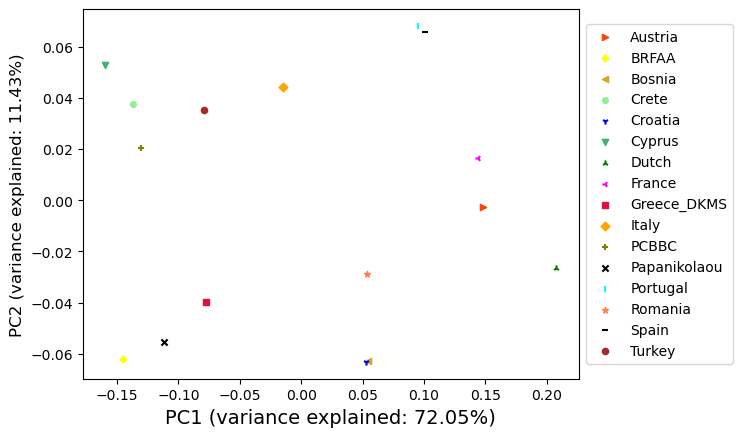

In [102]:
pca_pref_dkms(
    pca_input,
    countries_names,
    all_alleles=False,
    scaling = False,
    ) 